In [7]:
%matplotlib inline

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from corr import Analyse_CORR as sa
import talib as tb

conn=pymysql.connect("www.a667.com","kairuitouzi","kai070122","carry_investment",charset='utf8' ) 
sql="SELECT  * FROM wh_same_month_min WHERE prodcode='HSI'"
df1=pd.read_sql(sql,conn)
df1['ma60']=tb.MA(df1['close'].values,timeperiod=60)
df1['ma30']=tb.MA(df1['close'].values,timeperiod=30)
print(df1.shape)

(207173, 13)


In [4]:
dt1=dt.datetime(2019,3,29,9,15)
Source=df1
TA=Source[Source.datetime>=dt1]

sa1=Analyse_CORR(Source,TA)
res=sa1.corr()
res.head(10)

spent time: 0:00:58.043320


,Corr,datetime
206782,0.995,2019-03-29 00:59:00
6306,0.965,2018-03-14 14:24:00
161056,0.964,2018-12-28 15:27:00
60683,0.963,2018-06-29 00:48:00
186037,0.960,2019-02-22 14:28:00
121858,0.960,2018-10-20 00:08:00
11302,0.959,2018-03-26 13:54:00
31120,0.959,2018-05-08 00:05:00
174687,0.958,2019-01-23 15:23:00
61660,0.956,2018-07-03 11:20:00


In [8]:
dt1=dt.datetime(2019,3,28,9,15)
Source=df1
TA=df1.tail(100)

sa2=Analyse_CORR(Source,TA)
res2=sa2.corr()
res2.head(10)

spent time: 0:01:52.177416


,Corr,datetime
207072,0.917,2019-03-29 15:04:00
69049,0.875,2018-07-14 00:14:00
95105,0.864,2018-08-28 00:33:00
7238,0.861,2018-03-15 16:05:00
51637,0.860,2018-06-13 13:16:00
196000,0.856,2019-03-12 11:31:00
164605,0.855,2019-01-07 15:21:00
157897,0.854,2018-12-19 22:48:00
6995,0.854,2018-03-15 11:03:00
61070,0.851,2018-06-29 17:15:00


In [ ]:
sql="SELECT  * FROM wh_same_month_min5 WHERE prodcode='HSI'"
df2=pd.read_sql(sql,conn)
df2['ma60']=tb.MA(df2['close'].values,timeperiod=60)
print(df2.shape)

In [19]:
Source5=df2
TA5=Source5.tail(100)

sa5=Analyse_CORR(Source5,TA5)
res5=sa5.corr()
res5.head(10)

(26378, 12)
2019-03-28 09:15:00
spent time: 0:00:04.642265


,Corr,datetime
26277,0.840,2019-03-23 00:45:00
5140,0.745,2018-09-06 15:20:00
23668,0.722,2019-02-28 15:35:00
10271,0.698,2018-10-24 15:20:00
12033,0.692,2018-11-07 22:55:00
4074,0.688,2018-08-29 09:30:00
6708,0.687,2018-09-19 20:45:00
3973,0.682,2018-08-28 16:05:00
17392,0.680,2018-12-28 22:20:00
3467,0.679,2018-08-23 15:55:00


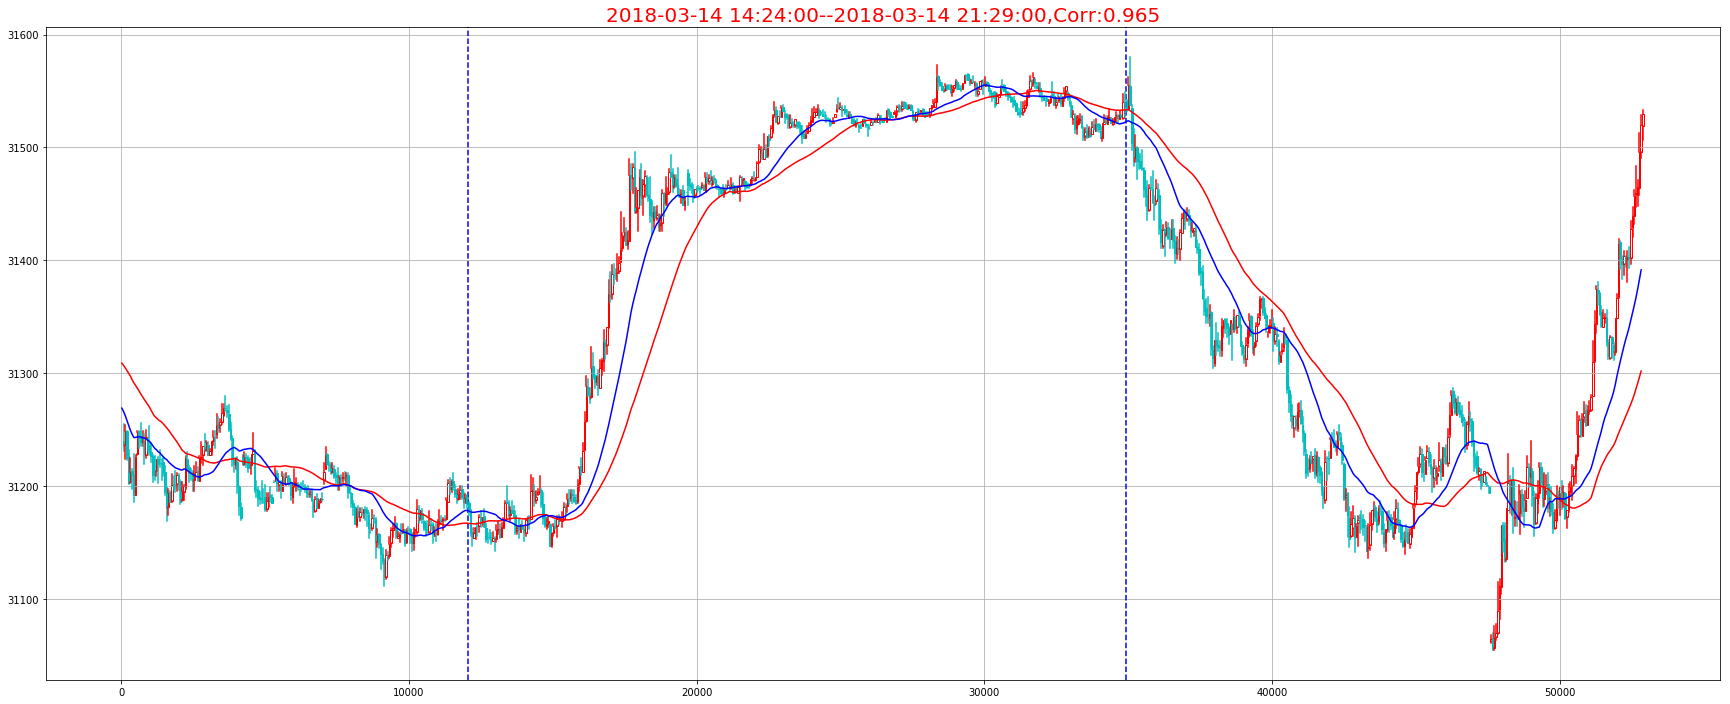

In [5]:
sa1.DrawNo(1,add1=200,add2=300)

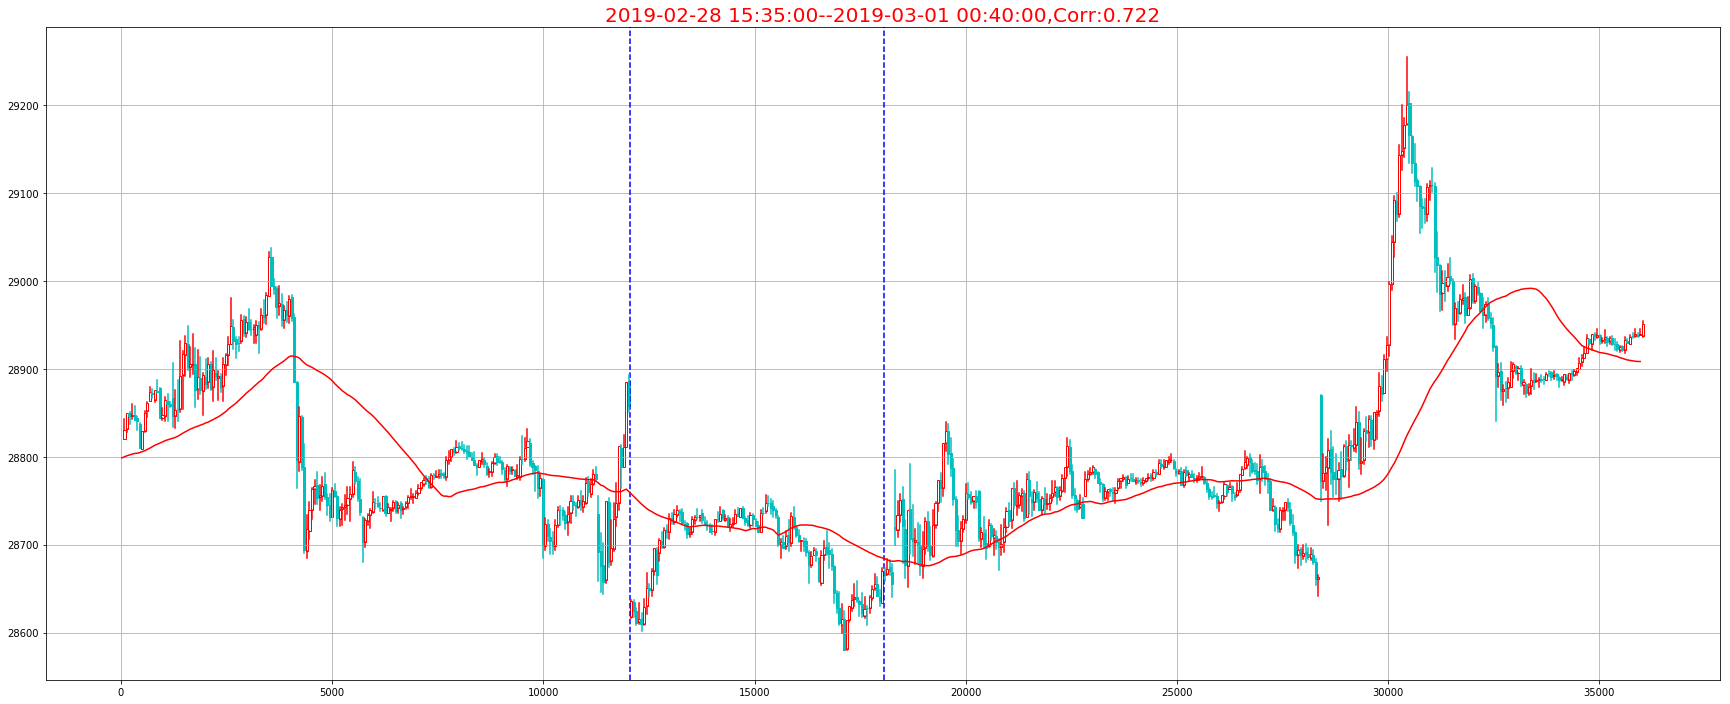

In [23]:
sa5.DrawNo(2,add1=200,add2=300)

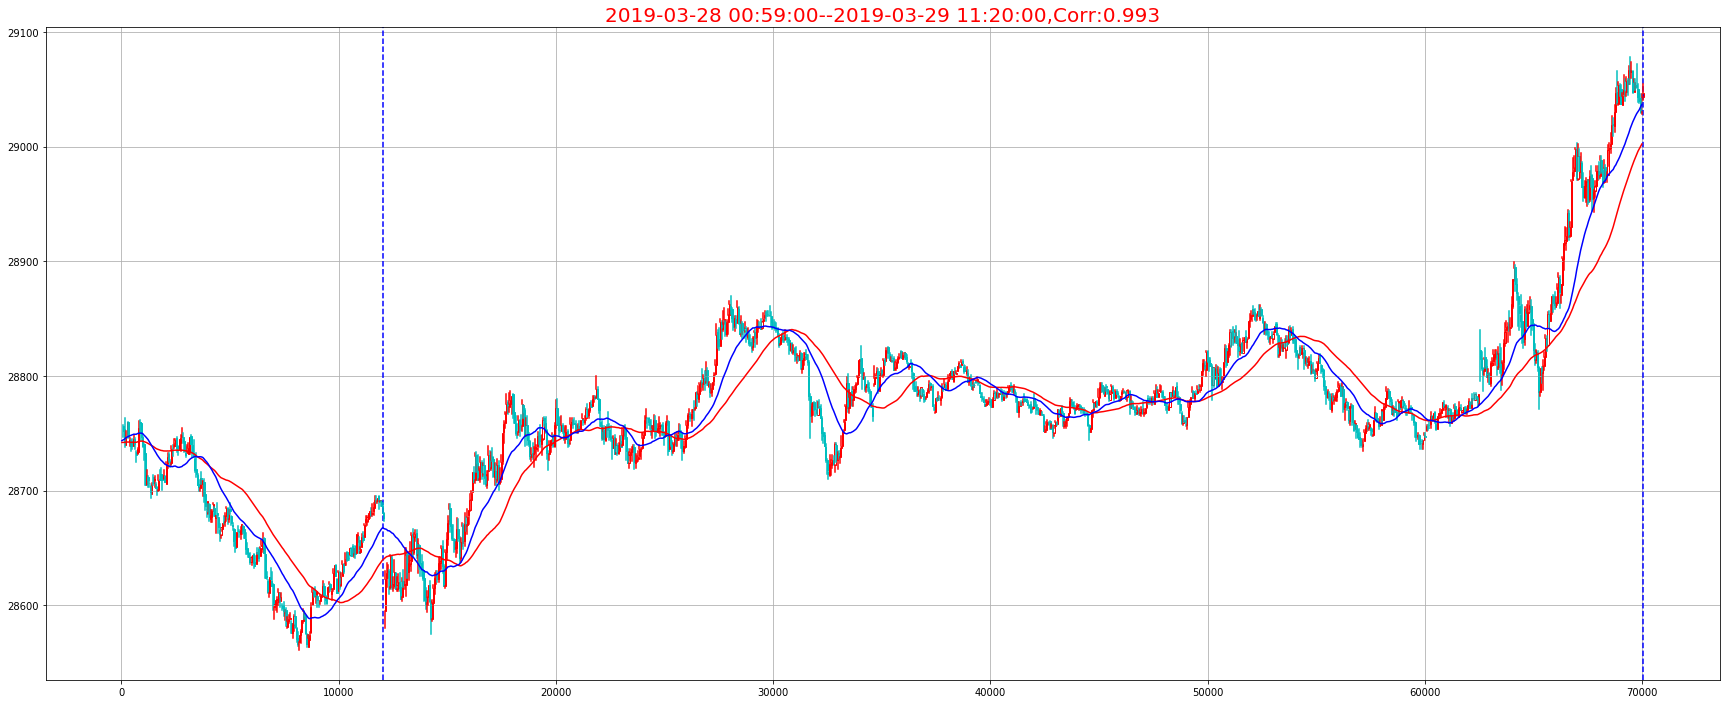

In [5]:
sa1.DrawNo(0,add1=200,add2=300)

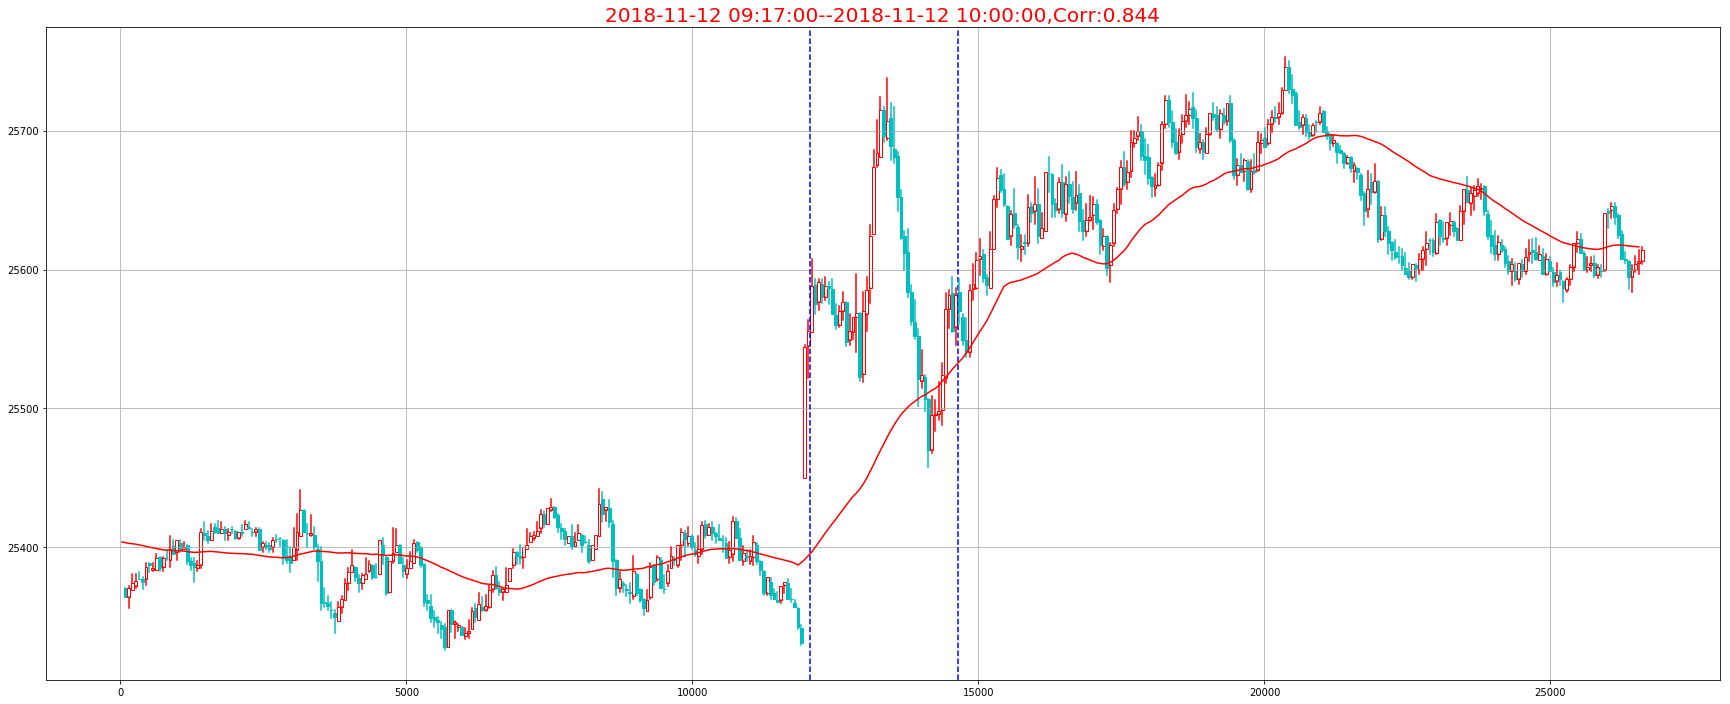

In [12]:
sa1.DrawNo(1,add1=200,add2=200)

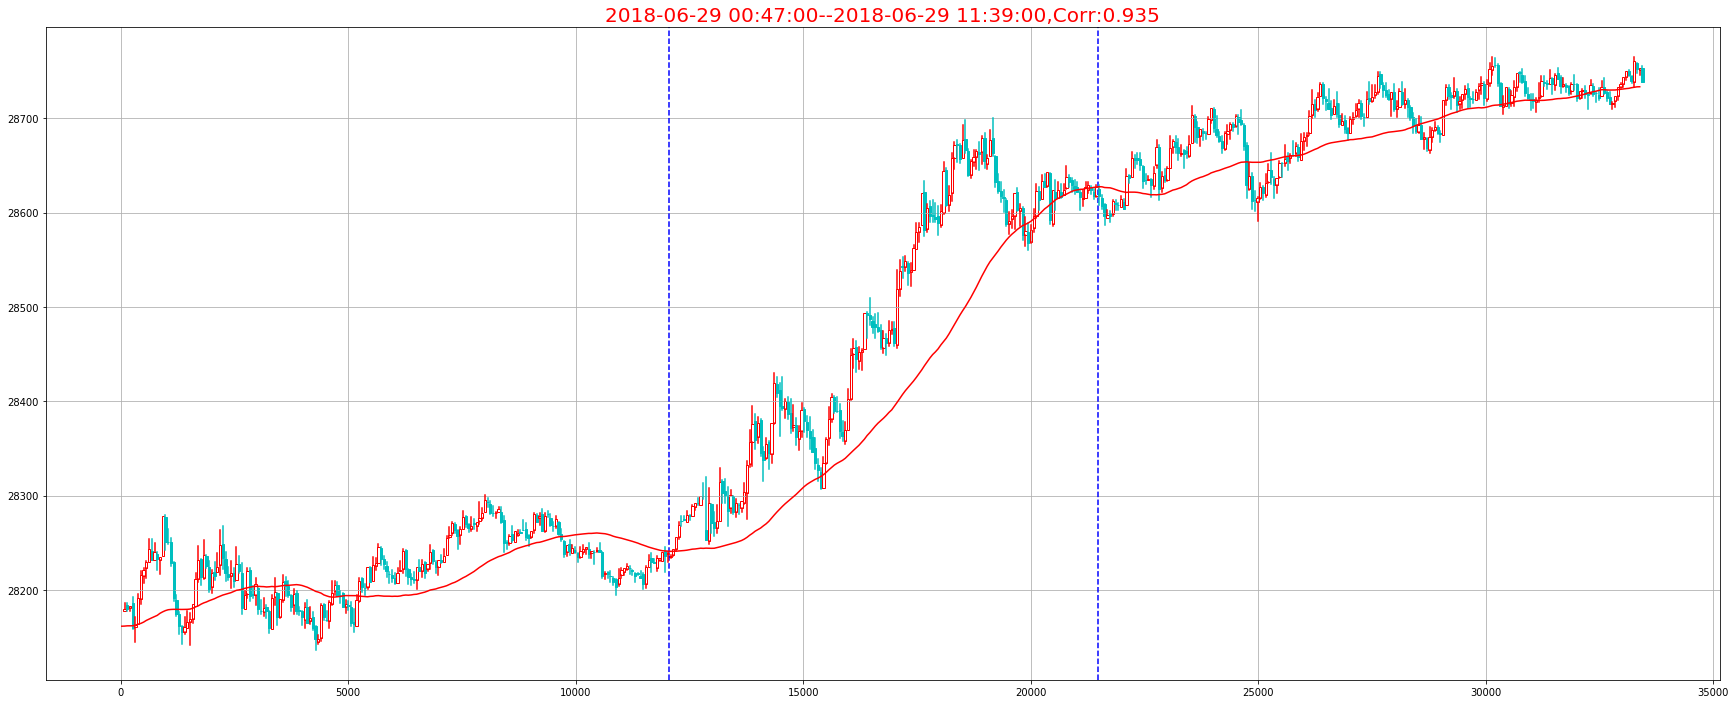

In [146]:
#快速的测试draw

sa2=Analyse_CORR(sa1.Data,sa1.DataT)
sa2.DF_CORR=sa1.DF_CORR
sa2.Data=sa1.Data #数据源
sa2.DataT=sa1.DataT
sa2.Amount=sa1.Amount
sa2.V1=sa1.V1
sa2.V2=sa2.V2
sa2.V2_LEN=sa2.V2_LEN
sa2.DrawNo(1,add1=200,add2=200)

In [6]:
for i in range(1,20):
    sa1.DrawNo(i,200,500,isSave=True,preF='329&1728_')
#     print(i)
plt.close('all')
print("OK")

OK


In [3]:
#------calc corrcoef 相关性
#匹配的K线个数
length=100
vv1=df1.tail(length)['close'].values
vv2=df1['close'].values
rows=len(vv2)

maxCorr=0
res=[]
resList=[]
# dt1=dt.datetime.now
for i in range(0,rows-length*2):
    vv3=vv2[i:length+i]
    corr=round(np.corrcoef(vv1,vv3)[0][1],3)
    resList.append([i,corr])
    if corr>maxCorr:
        maxCorr=corr
        res=[i,maxCorr]

print(res)

recc=pd.DataFrame(resList)
recc.columns=['No','Res']
newRec=recc.sort_values('Res',ascending=False)
newRec.head(20)

[2429, 0.864]


,No,Res
2429,2429,0.864
1571,1571,0.863
2430,2430,0.860
1570,1570,0.860
1572,1572,0.853
1569,1569,0.850
5949,5949,0.849
1568,1568,0.848
5948,5948,0.843
1567,1567,0.843


In [113]:
index=newRec.index[6]
leng=100
tmp=vv2[index:index+leng]
res1=[tmp.max(),tmp.min(),tmp.mean(),tmp.size,tmp.var(),tmp.ptp()]
data2=vv2[index+leng:index+leng*2]
res2=[data2.max(),data2.min(),data2.mean(),data2.size,data2.var(),data2.ptp()]
print(np.where(data2>tmp.mean())[0].size)
print(np.where(data2>tmp.min())[0].size)
print(np.where(data2>tmp.max())[0].size)
print(np.where(data2<tmp.mean())[0].size)
print(np.where(data2<tmp.min())[0].size)
print(np.where(data2<tmp.max())[0].size)
print(res1)
print(res2)

100
100
39
0
0
61
[23059.0, 19605.0, 21119.38, 100, 943799.2956000001, 3454.0]
[24084.0, 21538.0, 22909.76, 100, 341676.5024, 2546.0]


In [2]:
from KRData.HKData import HKFuture
import configparser
import datetime

conf_parser = configparser.ConfigParser()
conf_parser.read( 'conf.ini')
db_host = conf_parser.get('MGDB', 'host')
db_user = conf_parser.get('MGDB', 'user')
db_password = conf_parser.get('MGDB', 'password')

hk = HKFuture(pwd=db_password,host=db_host,user=db_user)
hk.get_all_codes()
_fields = ['datetime', 'code', 'open', 'high', 'low', 'close', 'vol']
hsi=hk.get_main_contract_bars('HSI', _fields)

In [44]:
d2=hsi['close'].values
len(d2)

1221197

In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import datetime as dt
import mpl_toolkits.axisartist as AA

class Analyse_CORR:
    def __init__(self):
        self.Test='Test'
    
    def __init__(self,source,target):
        self.Data=source #数据源
        self.DataT=target
        self.Amount=len(target)  #分析的个数
        self.V1=target['close'].values #分析的数据集
        self.V2=source['close'].values #总数据集
        self.V2_LEN=len(self.V2)
#         self.FIG,self.AX = plt.subplots(figsize=(30,12),dpi=200)
#         self.FIG=plt.figure(figsize=(30,12),dpi=200)
#         self.AX=self.FIG.add_subplot(111)
        
    def corr(self):
        resList=[]
        vv1=self.V1
        vv2=self.V2
        rows=self.V2_LEN
        length=self.Amount
        time1=dt.datetime.now()
        for i in range(0,rows-length):
            vv3=vv2[i:length+i]
            corr=round(np.corrcoef(vv1,vv3)[0][1],3)
            resList.append(corr)
        diff=int(length*0.5)
        res=self.fix_corr(resList,diff)
        time2=dt.datetime.now()
        print("spent time:",time2-time1)
        return res
    
    def fix_corr(self,source,diff=60):
        df_corr=pd.DataFrame(source)
        df_corr.columns=['Corr']
        df_corr.sort_values('Corr',ascending=False,inplace=True)

        newList=[]
        for row in df_corr.iterrows():
            index=row[0]
            insert=True
            for i in newList:
                if i> index-diff and i< index+diff:
                    insert=False
                    break
            if insert:
                newList.append(index)

        df_res=df_corr.loc[newList]
        df_res['datetime']=df_res.apply(lambda x:self.Data.iloc[x.name]['datetime'],axis=1)
        self.DF_CORR=df_res
        return df_res
    
    #draw kline
    def DrawKK(self,aa,add1=0,add2=0,preF='T_',corr=0,isSave=False):
        fig =plt.figure(figsize=(30, 12),facecolor='w')
        ax =fig.add_subplot(111)       
#         ax = AA.Axes(self.FIG, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
#         self.FIG.add_axes(ax)
#         ax.clear()
#         ax.clear()
        k_width = 50
        k_diff = 10
        kline = k_width + k_diff
        d=0
        rows=len(aa)
        if add1>0:
            ax.axvline((add1+1)*kline,ymax=1,c='b',ls='dashed')
        if add2>0:
            ax.axvline((add1+self.Amount+1)*kline,ymax=1,c='b',ls='dashed')
        for i in aa.iterrows():
            d=d+1
            x = d * kline
            O = i[1]['open']
            C = i[1]['close']
            L = i[1]['low']
            H = i[1]['high']
            hh = abs(C - O)
            x1 = x + k_width / 2
            if C > O:
                a = False
                y = O
                cc = 'R'
                # 上影线 下影线
                line1 = Line2D((x1, x1), (C, H), color=cc)
                line2 = Line2D((x1, x1), (O, L), color=cc)

                ax.add_line(line1)
                ax.add_line(line2)
            else:
                a = True
                y = C
                cc = 'C'
                # 影线
                line = Line2D((x1, x1), (L, H), color=cc)
                ax.add_line(line)
            hh = abs(C - O)

            # K线实体
            rec = Rectangle((x, y), k_width, hh, fill=a, color=cc)
            ax.add_patch(rec)
            
        plt.plot(aa.index*kline + k_width / 2,aa['ma60'],c='r')
        plt.plot(aa.index*kline + k_width / 2,aa['ma30'],c='b')
        ax.grid()
        ax.autoscale(tight=False)
        ax.autoscale_view()
        time1=aa.iloc[add1]['datetime']
        if add2==0:
            diff=-1
        else:
            diff=add1+self.Amount          
        if (diff-1)>rows:
            diff=rows-1
               
        time2=aa.iloc[diff]['datetime']
        title="%s--%s,Corr:%.3f" %(time1,time2,corr)
        ax.set_title(title, fontsize=20, color='r')
        if isSave:
            file="res/%s%d_%.7s.jpg"%(preF,self.Amount,time1)
            fig.savefig(file)
            self.FIG=fig
            fig.clear()
            plt.close(fig)
    
    def DrawIndex(self,ind,add1=0,add2=0,isSave=False,preF='T_'):
        if add1>ind:
            add1=ind
        begin=ind-add1
        length=self.Amount
        end=begin+length+add2+add1
        df2=self.Data.iloc[begin:end]
        df2.reset_index(inplace=True)
        self.D2=df2
        v1=self.DF_CORR.loc[ind]['Corr']
        file="res/%s.jpg"%(ind)
        self.DrawKK(df2,add1=add1,add2=add2,corr=v1,isSave=isSave,preF=preF)
        
    def DrawNo(self,no,add1=0,add2=0,isSave=False,preF='T_'):
        index=self.DF_CORR.index[no]
        self.DrawIndex(index,add1,add2,isSave,preF=preF+str(no)+"_")
        
print("OK")


OK


In [114]:
class TestPLT:
    def __init__(self):
        self.FIG,self.AX =plt.subplots(figsize=(8,6),facecolor='w',dpi=100)
        
    def toSave(self,i):
        ax1=self.AX
    
        x = np.arange(0, 100)
        ax1.plot(x, np.log(x))
        name="Test_%d"%(i)
        ax1.set_title(name)
        self.FIG.savefig("res/%s.jpg"%(name))

Text(0.5,1,'c    cc')

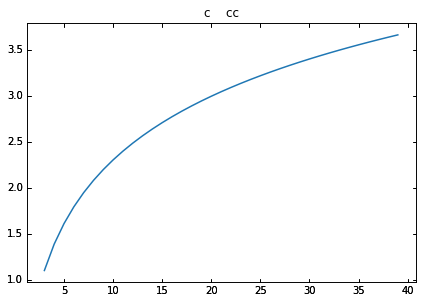

In [3]:
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() #定义figure，（1）中的1是什么
# ax=fig.add_subplot(111)
ax = AA.Axes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
fig.add_axes(ax)
x = np.arange(1, 100)
ax.plot(x, np.log(x))
ax.set_title('aa')
plt.clf()
ax = AA.Axes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
fig.add_axes(ax)
# ax=fig.add_subplot(111)
ax.clear()
x = np.arange(3, 40)
ax.plot(x, np.log(x))
ax.set_title("c    cc")
